In [9]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series as s
import numpy as np

In [10]:
os.getcwd() #use your own directory name

'C:\\Users\\admin\\Desktop\\JP_PS\\Assignments\\ps3'

In [11]:
os.chdir('/Users/admin/Desktop/JP_PS/ps3')

In [12]:
#read the files, i have downloaded the below files from the internet
data1 = pd.read_csv('BTC_USD_ps3.csv')
data2 = pd.read_csv('SP500_ps3.csv')
data3 = pd.read_csv('DEXUSEU_ps3.csv')
data4 = pd.read_csv('GOLDAMGBD228NLBM_ps3.csv')
data5 = pd.read_csv('DCOILWTICO_ps3.csv')

In [13]:

data2.rename(columns={'DATE': 'Date'}, inplace=True)
data3.rename(columns={'DATE': 'Date'}, inplace=True)
data4.rename(columns={'DATE': 'Date'}, inplace=True)
data5.rename(columns={'DATE': 'Date'}, inplace=True)

In [14]:
data6 = pd.merge(data1, data2, how='left')

In [15]:
data7 = pd.merge(data6,data3, how='left')
data8 = pd.merge(data7, data4, how='left')
data = pd.merge(data8, data5, how='left')

In [16]:
len(data['Date'].unique())

363

In [19]:
data.isnull().sum()

Currency                 0
Date                     0
Closing Price (USD)      0
24h Open (USD)           0
24h High (USD)           0
24h Low (USD)            0
SP500                  363
DEXUSEU                363
GOLDAMGBD228NLBM       363
DCOILWTICO             363
dtype: int64

In [20]:
data['Date'] = pd.to_datetime(data['Date'])

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 363 entries, 0 to 362
Data columns (total 10 columns):
Currency               363 non-null object
Date                   363 non-null datetime64[ns]
Closing Price (USD)    363 non-null float64
24h Open (USD)         363 non-null float64
24h High (USD)         363 non-null float64
24h Low (USD)          363 non-null float64
SP500                  0 non-null object
DEXUSEU                0 non-null object
GOLDAMGBD228NLBM       0 non-null object
DCOILWTICO             0 non-null object
dtypes: datetime64[ns](1), float64(4), object(5)
memory usage: 31.2+ KB


In [22]:
data.values[data['SP500']=='.'] = np.nan
data.values[data['DEXUSEU']=='.'] = np.nan
data.values[data['GOLDAMGBD228NLBM']=='.'] = np.nan
data.values[data['DCOILWTICO']=='.'] = np.nan

In [23]:
data.info()
#data['SP500_ps3']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 363 entries, 0 to 362
Data columns (total 10 columns):
Currency               363 non-null object
Date                   363 non-null datetime64[ns]
Closing Price (USD)    363 non-null float64
24h Open (USD)         363 non-null float64
24h High (USD)         363 non-null float64
24h Low (USD)          363 non-null float64
SP500                  0 non-null object
DEXUSEU                0 non-null object
GOLDAMGBD228NLBM       0 non-null object
DCOILWTICO             0 non-null object
dtypes: datetime64[ns](1), float64(4), object(5)
memory usage: 31.2+ KB


In [24]:
import numpy as np
data.info()
len(data['Date'].unique())
#data.to_excel('laet.xlsx')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 363 entries, 0 to 362
Data columns (total 10 columns):
Currency               363 non-null object
Date                   363 non-null datetime64[ns]
Closing Price (USD)    363 non-null float64
24h Open (USD)         363 non-null float64
24h High (USD)         363 non-null float64
24h Low (USD)          363 non-null float64
SP500                  0 non-null object
DEXUSEU                0 non-null object
GOLDAMGBD228NLBM       0 non-null object
DCOILWTICO             0 non-null object
dtypes: datetime64[ns](1), float64(4), object(5)
memory usage: 31.2+ KB


363

In [373]:
data['SP500_ps3'] = pd.to_numeric(data['SP500_'], errors='coerce')
data['DEXUSEU'] = pd.to_numeric(data['DEXUSEU'], errors='coerce')
data['GOLDAMGBD228NLBM'] = pd.to_numeric(data['GOLDAMGBD228NLBM'], errors='coerce')
data['DCOILWTICO'] = pd.to_numeric(data['DCOILWTICO'], errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1895 entries, 0 to 1894
Data columns (total 11 columns):
Date                1895 non-null datetime64[ns]
Price               1895 non-null object
Open                1895 non-null object
High                1895 non-null object
Low                 1895 non-null object
Vol.                1895 non-null object
Change %            1895 non-null object
SP500               1306 non-null float64
DEXUSEU             1295 non-null float64
GOLDAMGBD228NLBM    1312 non-null float64
DCOILWTICO          1297 non-null float64
dtypes: datetime64[ns](1), float64(4), object(6)
memory usage: 177.7+ KB


In [374]:
#data.to_excel('finaltest.xlsx')

In [375]:
#Handling regex in price 
data['Price'] = data['Price'].str.replace(',',repl='')

In [376]:
#
data['Price'] = pd.to_numeric(data['Price'])

In [377]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1895 entries, 0 to 1894
Data columns (total 11 columns):
Date                1895 non-null datetime64[ns]
Price               1895 non-null float64
Open                1895 non-null object
High                1895 non-null object
Low                 1895 non-null object
Vol.                1895 non-null object
Change %            1895 non-null object
SP500               1306 non-null float64
DEXUSEU             1295 non-null float64
GOLDAMGBD228NLBM    1312 non-null float64
DCOILWTICO          1297 non-null float64
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 177.7+ KB


In [378]:
#Interpolation for missing values 

data['SP500'] = data['SP500'].interpolate(method='linear')
data['DEXUSEU'] = data['DEXUSEU'].interpolate(method='linear')
data['GOLDAMGBD228NLBM'] = data['GOLDAMGBD228NLBM'].interpolate(method='linear')
data['DCOILWTICO'] = data['DCOILWTICO'].interpolate(method='linear')

In [379]:
#Setting Index as date 
data1 = data
data1 = data1.set_index('Date')
data1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1895 entries, 2019-03-26 to 2014-01-01
Data columns (total 10 columns):
Price               1895 non-null float64
Open                1895 non-null object
High                1895 non-null object
Low                 1895 non-null object
Vol.                1895 non-null object
Change %            1895 non-null object
SP500               1895 non-null float64
DEXUSEU             1891 non-null float64
GOLDAMGBD228NLBM    1894 non-null float64
DCOILWTICO          1887 non-null float64
dtypes: float64(5), object(5)
memory usage: 162.9+ KB


Text(0.5,1,'DCOILWTICO Series Plot')

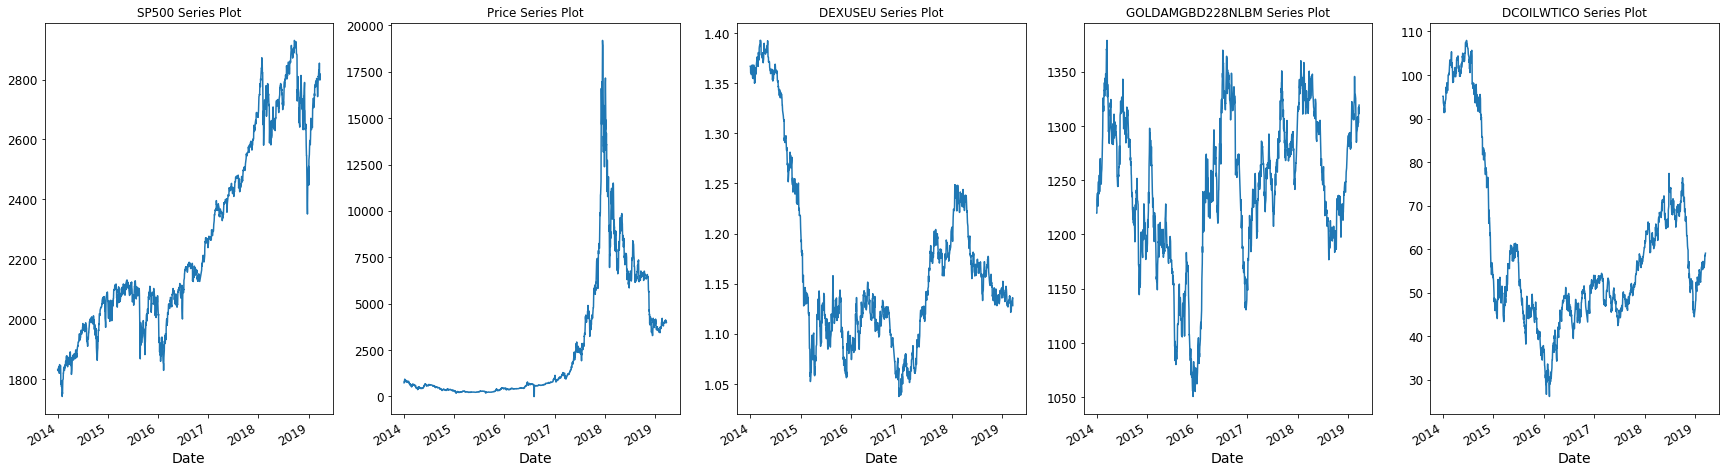

In [380]:
#-------Plotting Series


f, ax =plt.subplots(1,5,figsize=(30,8))


data1['SP500'].plot(ax=ax[0])
ax[0].set_title('SP500 Series Plot')
data1['Price'].plot(ax=ax[1])
ax[1].set_title('Price Series Plot')
data1['DEXUSEU'].plot(ax=ax[2])
ax[2].set_title('DEXUSEU Series Plot')
data1['GOLDAMGBD228NLBM'].plot(ax=ax[3])
ax[3].set_title('GOLDAMGBD228NLBM Series Plot')
data1['DCOILWTICO'].plot(ax=ax[4])
ax[4].set_title('DCOILWTICO Series Plot')

In [381]:
data.isnull().sum()

Date                0
Price               0
Open                0
High                0
Low                 0
Vol.                0
Change %            0
SP500               0
DEXUSEU             4
GOLDAMGBD228NLBM    1
DCOILWTICO          8
dtype: int64

In [382]:
data['DCOILWTICO'].replace('', np.nan, inplace=True)

In [383]:
data.dropna(subset=['DCOILWTICO'], inplace=True)

In [384]:
#Final check to see if there are any null values remaining 
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1887 entries, 8 to 1894
Data columns (total 11 columns):
Date                1887 non-null datetime64[ns]
Price               1887 non-null float64
Open                1887 non-null object
High                1887 non-null object
Low                 1887 non-null object
Vol.                1887 non-null object
Change %            1887 non-null object
SP500               1887 non-null float64
DEXUSEU             1887 non-null float64
GOLDAMGBD228NLBM    1887 non-null float64
DCOILWTICO          1887 non-null float64
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 176.9+ KB


,Date,Price,Open,High,Low,Vol.,Change %,SP500,DEXUSEU,GOLDAMGBD228NLBM,DCOILWTICO
8,2019-03-18,4073.5,"4,069.00","4,119.90","4,035.60",3.68K,0.11%,2832.940000,1.133700,1305.35,59.090000
9,2019-03-17,4068.9,"4,088.00","4,088.30","4,041.10",3.38K,-0.47%,2829.453333,1.133333,1304.45,58.896667
10,2019-03-16,4088.0,"4,003.10","4,152.70","4,003.10",13.94K,2.12%,2825.966667,1.132967,1303.55,58.703333
11,2019-03-15,4003.1,"3,948.30","4,011.00","3,948.30",6.72K,1.39%,2822.480000,1.132600,1302.65,58.510000
12,2019-03-14,3948.3,"3,946.20","4,000.10","3,882.80",8.30K,0.01%,2808.480000,1.130400,1299.20,58.590000


In [385]:
#Running a Linear Regression

from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
X = data[data.columns.difference(['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %','Date'])]
y = data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [386]:
#Coefficients of the regression
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[idx]))
print('The Intercept is:',regression_model.intercept_)    

The coefficient for DCOILWTICO is -65.15312078814497
The coefficient for DEXUSEU is 24706.87321668412
The coefficient for GOLDAMGBD228NLBM is -3.111038068855648
The coefficient for SP500 is 10.108267104899767
The Intercept is: -41455.35855353214


In [387]:
from statsmodels.tsa.stattools import kpss

#0.1 difference to become stationary

print (kpss(data['SP500'].diff()[1:],regression='c'))
print (kpss(data['DEXUSEU'].diff()[1:], regression='ct'))
print (kpss(data['GOLDAMGBD228NLBM'].diff()[1:], regression='ct'))
print (kpss(data['DCOILWTICO'].diff()[1:], regression='ct'))



(0.048253145353569254, 0.1, 26, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
(0.11253683085957897, 0.1, 26, {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})
(0.03339967123465097, 0.1, 26, {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})
(0.0877289814667346, 0.1, 26, {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [388]:
from datetime import date as dt

#data[(data['Date'].dt.year >= 2017)]

#Removing data before a particular date:

df = data[~(data['Date'] < '2017-01-01')]



In [389]:
df.tail()

,Date,Price,Open,High,Low,Vol.,Change %,SP500,DEXUSEU,GOLDAMGBD228NLBM,DCOILWTICO
810,2017-01-05,1003.2,"1,139.80","1,166.00",865.4,91.20K,-11.97%,2269.00,1.0598,1173.0500,53.7700
811,2017-01-04,1139.6,"1,037.50","1,150.00","1,036.40",53.73K,9.84%,2270.75,1.0476,1165.9000,53.2600
812,2017-01-03,1037.5,"1,019.30","1,038.70","1,013.50",14.11K,1.79%,2257.83,1.0416,1148.6500,52.3600
813,2017-01-02,1019.3,999.2,"1,034.80",997.3,21.82K,2.03%,2253.08,1.0450,1151.2625,52.7075
814,2017-01-01,999.0,966.6,"1,006.50",961.3,13.44K,3.35%,2248.33,1.0484,1153.8750,53.0550


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 807 entries, 2019-03-18 to 2017-01-01
Data columns (total 10 columns):
Price               807 non-null float64
Open                807 non-null object
High                807 non-null object
Low                 807 non-null object
Vol.                807 non-null object
Change %            807 non-null object
SP500               807 non-null float64
DEXUSEU             807 non-null float64
GOLDAMGBD228NLBM    807 non-null float64
DCOILWTICO          807 non-null float64
dtypes: float64(5), object(5)
memory usage: 69.4+ KB


Text(0.5,1,'DCOILWTICO Series Plot')

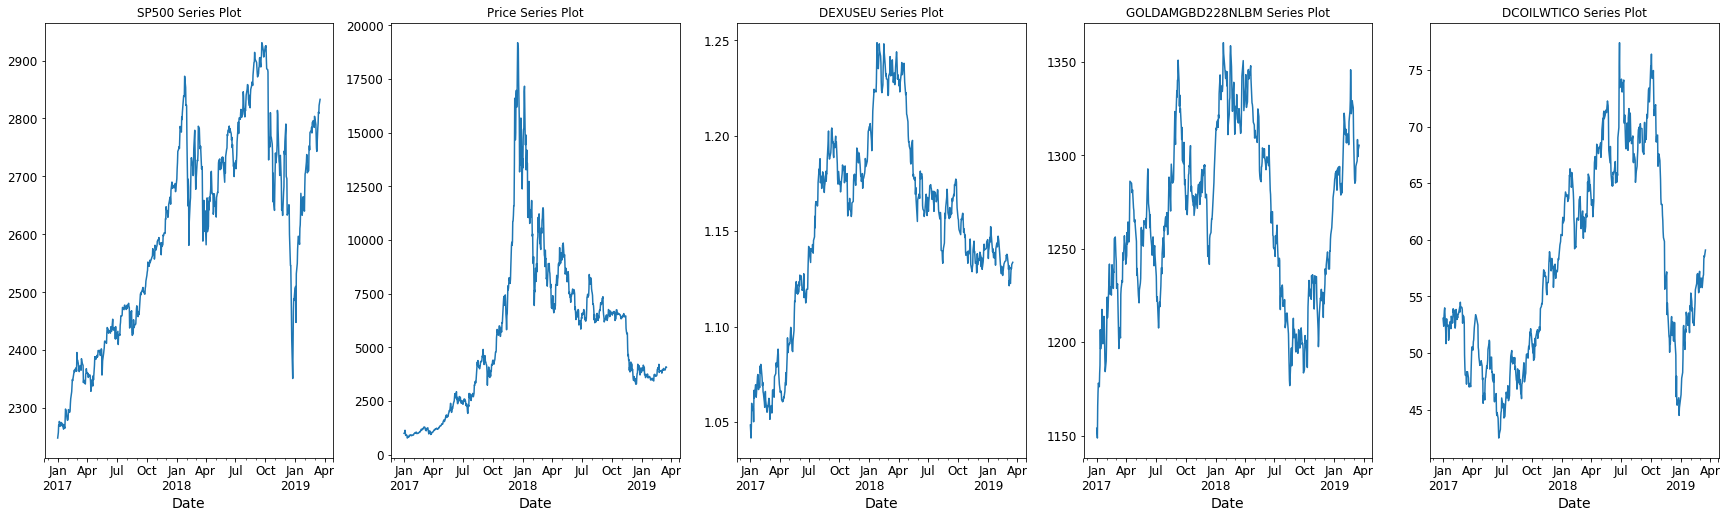

In [390]:
df1 = df
df1 = df1.set_index('Date')
df1.info()

#-------Plotting before 2017 

f, ax =plt.subplots(1,5,figsize=(30,8))


df1['SP500'].plot(ax=ax[0])
ax[0].set_title('SP500 Series Plot')
df1['Price'].plot(ax=ax[1])
ax[1].set_title('Price Series Plot')
df1['DEXUSEU'].plot(ax=ax[2])
ax[2].set_title('DEXUSEU Series Plot')
df1['GOLDAMGBD228NLBM'].plot(ax=ax[3])
ax[3].set_title('GOLDAMGBD228NLBM Series Plot')
df1['DCOILWTICO'].plot(ax=ax[4])
ax[4].set_title('DCOILWTICO Series Plot')

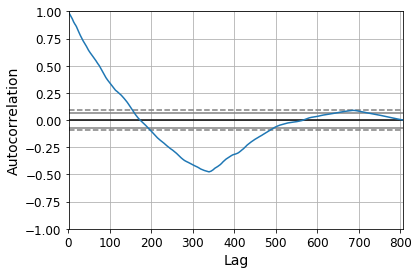

In [391]:
# ACF of Bitcoin Price 

#np.corrcoef(df['Price'][1:-1], df['Price'][2:])

from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Price'])

plt.show()

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of 

                             ARIMA Model Results                              
Dep. Variable:                D.Price   No. Observations:                  806
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -5906.915
Method:                       css-mle   S.D. of innovations            368.582
Date:                Wed, 10 Apr 2019   AIC                          11827.829
Time:                        16:01:16   BIC                          11860.674
Sample:                             1   HQIC                         11840.442
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -3.8015     14.481     -0.263      0.793     -32.184      24.581
ar.L1.D.Price     0.0546      0.035      1.564      0.118      -0.014       0.123
ar.L2.D.Price    -0.0053      0.035     

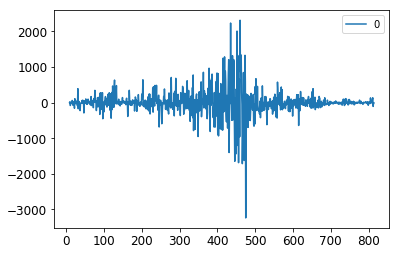

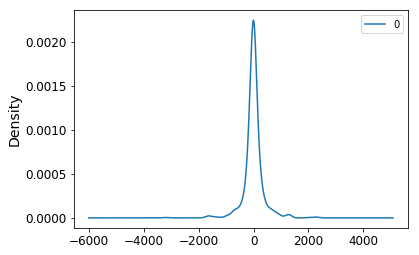

                 0
count   806.000000
mean      0.000789
std     368.811311
min   -3239.966010
25%     -96.695230
50%      -7.789669
75%      85.275015
max    2313.549590


In [392]:
# Fitting ARIMA model:

from statsmodels.tsa.arima_model import ARIMA
from pandas import DataFrame

model = ARIMA(df["Price"], order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

#Plotting Residuals error
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `ar

predicted=4299.486063, expected=4400.100000
predicted=4399.513738, expected=4404.300000
predicted=4408.545514, expected=4367.000000
predicted=4344.327132, expected=4169.900000
predicted=4162.700765, expected=4190.000000
predicted=4204.174661, expected=4205.400000
predicted=4206.139521, expected=3879.100000
predicted=3872.925985, expected=3930.000000
predicted=3907.942707, expected=3652.800000
predicted=3628.407292, expected=3779.600000
predicted=3824.128455, expected=3598.500000
predicted=3530.424004, expected=3603.400000
predicted=3640.686347, expected=3873.200000
predicted=3835.383662, expected=3900.000000
predicted=3933.654054, expected=4084.100000
predicted=4076.060773, expected=3666.300000
predicted=3614.080790, expected=3685.400000
predicted=3727.409549, expected=3698.000000
predicted=3675.043631, expected=3238.100000
predicted=3275.222103, expected=3849.700000
predicted=3829.613972, expected=4142.900000
predicted=4145.170699, expected=4203.000000
predicted=4265.423699, expected=

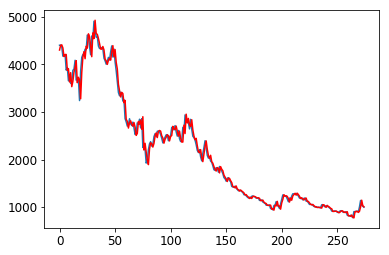

In [393]:
#Forecasting ARIMA model:

from sklearn.metrics import mean_squared_error

X = df['Price'].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [394]:
from itertools import product

p = d = q = range(0, 2)
pdq = list(product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('ARIMA: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('ARIMA: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('ARIMA: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('ARIMA: {} x {}'.format(pdq[2], seasonal_pdq[4]))





Examples of parameter combinations for Seasonal ARIMA...
ARIMA: (0, 0, 1) x (0, 0, 1, 12)
ARIMA: (0, 0, 1) x (0, 1, 0, 12)
ARIMA: (0, 1, 0) x (0, 1, 1, 12)
ARIMA: (0, 1, 0) x (1, 0, 0, 12)


In [395]:
from statsmodels.tsa.arima_model import ARIMA
maxa = 10
outp = np.zeros(((maxa+1)**2,3))
count = 0
for i in range(6,maxa+1):
    print((round(i*(maxa+1)/(maxa+1)**2*100,2)),'%...')
    for j in range(1,4):
        try:
            mod = ARIMA(data['Price'],order=(i,1,j))
            results = mod.fit()
            outp[count,:]= np.array([[i],[j],[results.aic]]).T
            count+=1
        except:
            continue
outp = pd.DataFrame(outp)
outp.columns = ['p','q','AIC']
outp = outp.loc[(outp!=0).any(axis=1)].sort_values('AIC')
print("best p and q are:",outp.iloc[0,:])

54.55 %...


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was pro

63.64 %...


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was pro

72.73 %...


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was pro

81.82 %...


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was pro

90.91 %...


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was pro

best p and q are: p          9.000000
q          2.000000
AIC    25945.963371
Name: 10, dtype: float64


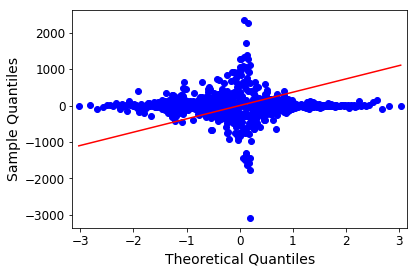

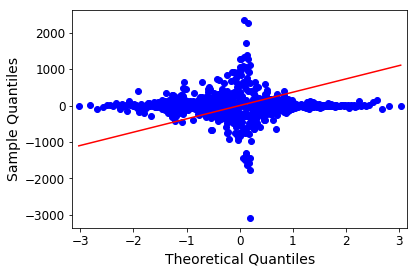

In [396]:
import statsmodels.api as sm

sm.ProbPlot(resid).qqplot(line='s')

In [397]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 807 entries, 2019-03-18 to 2017-01-01
Data columns (total 10 columns):
Price               807 non-null float64
Open                807 non-null object
High                807 non-null object
Low                 807 non-null object
Vol.                807 non-null object
Change %            807 non-null object
SP500               807 non-null float64
DEXUSEU             807 non-null float64
GOLDAMGBD228NLBM    807 non-null float64
DCOILWTICO          807 non-null float64
dtypes: float64(5), object(5)
memory usage: 69.4+ KB


In [403]:
df1.sort_index(inplace = True)
df1.head(5)
y = df1['Price']

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


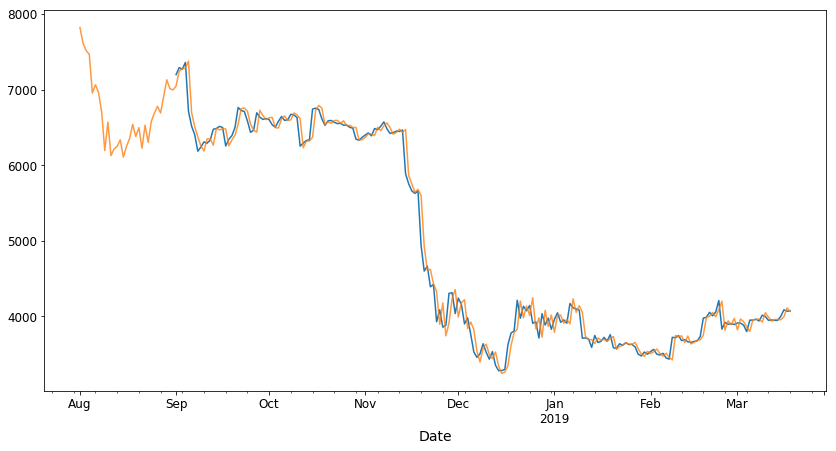

In [404]:

mod = ARIMA(df1['Price'],order=(9,1,2))
results = mod.fit()

pred = results.predict(start=pd.to_datetime('2018-08-01'), dynamic=False,typ='levels')
pred_ci = pred
ax = y['2018-09':].plot(label='observed')
y = df1['Price']
pred.plot(ax=ax, label='One-step ahead Forecast', alpha=.8, figsize=(14, 7))

#fcast =results.predict(start=str(start_date),end = str(end_date), dynamic=False,typ='levels')
#fig = results.plot_predict(start_date, end_date, dynamic=False, ax=ax)
#ax.set_xlabel('Date')
#ax.set_ylabel('Bitcoin Value')
#plt.legend()
#plt.show()


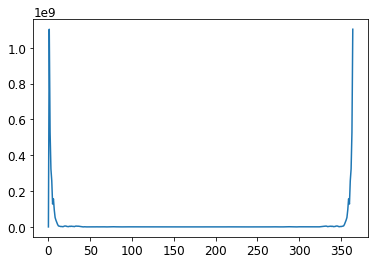

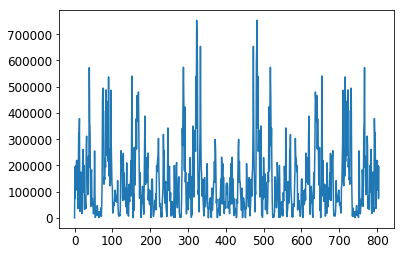

In [405]:
#Periodigram 

#There is no seasonality 

from statsmodels.tsa.stattools import periodogram
plt.plot(periodogram(bprice))
plt.show()
plt.plot(periodogram(bprice_1d))

In [406]:
y['2017-01':]


Date
2017-01-01     999.0
2017-01-02    1019.3
2017-01-03    1037.5
2017-01-04    1139.6
2017-01-05    1003.2
2017-01-06     898.0
2017-01-07     908.8
2017-01-08     915.9
2017-01-09     903.0
2017-01-10     905.8
2017-01-11     778.6
2017-01-12     804.6
2017-01-13     828.1
2017-01-14     815.3
2017-01-15     820.7
2017-01-16     830.1
2017-01-17     904.0
2017-01-18     887.8
2017-01-19     900.3
2017-01-20     896.0
2017-01-21     924.0
2017-01-22     923.7
2017-01-23     910.0
2017-01-24     886.1
2017-01-25     893.3
2017-01-26     915.1
2017-01-27     916.7
2017-01-28     919.4
2017-01-29     912.6
2017-01-30     917.4
               ...  
2019-02-17    3734.5
2019-02-18    3978.1
2019-02-19    3989.9
2019-02-20    4055.0
2019-02-21    4008.8
2019-02-22    4058.3
2019-02-23    4211.7
2019-02-24    3832.0
2019-02-25    3921.8
2019-02-26    3896.8
2019-02-27    3902.7
2019-02-28    3894.0
2019-03-01    3914.0
2019-03-02    3913.0
2019-03-03    3884.8
2019-03-04    3800.0
2019-03-

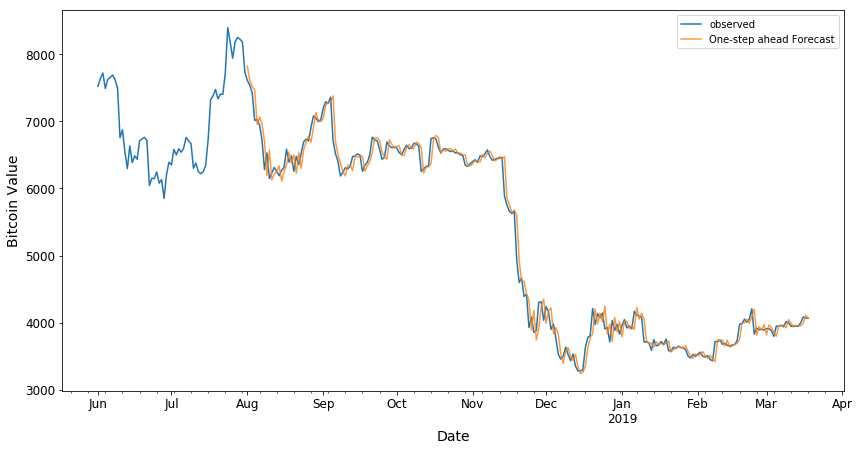

In [407]:
pred = results.predict(start=pd.to_datetime('2018-08-01'), dynamic=False,typ='levels')
pred_ci = pred
ax = y['2018-06':].plot(label='observed')
pred.plot(ax=ax, label='One-step ahead Forecast', alpha=.8, figsize=(14, 7))
#ax.fill_between(pred_ci.index, pred_ci.iloc[:], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Bitcoin Value')
plt.legend()
plt.show()



Forecast Days: 30


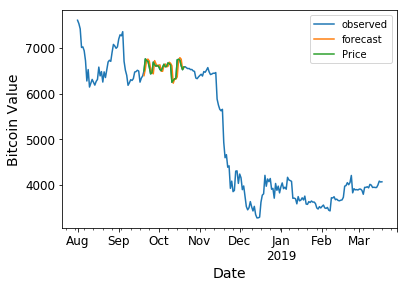

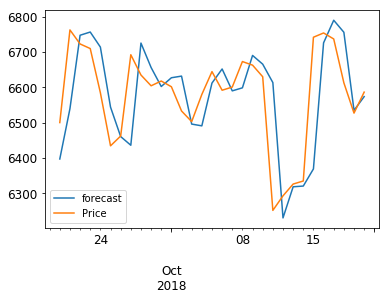

In [408]:
from datetime import datetime  
from datetime import timedelta  
start_date = pd.to_datetime('2018-09-20')
end_date = start_date+timedelta(days=int(input('Forecast Days: ')))
fcast = results.predict(start=start_date,end = end_date, dynamic=False,typ='levels')
fcast_ci = fcast
ax = y['2018-08':].plot(label='observed')
results.plot_predict(start_date,end_date)
fig = results.plot_predict(start_date, end_date, dynamic=False, ax=ax)
ax.set_xlabel('Date')
ax.set_ylabel('Bitcoin Value')
plt.legend()
plt.show()

In [409]:
df.sort_values(by='Date', inplace=True)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [410]:
df_2017 = final_date_2017[final_date_2017.columns.difference(['Open', 'High', 'Low', 'Vol.', 'Change %'])]

In [411]:
final_1d = df_2017.diff().dropna()
final_1d
from statsmodels.tsa.vector_ar import var_model
var= var_model.VAR(final_1d)
np.argmin(var.select_order().ics['aic'])
var_results = var.fit(maxlags=1)
var_results.summary()


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 10, Apr, 2019
Time:                     17:45:10
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                    9.30807
Nobs:                     805.000    HQIC:                   9.20039
Log likelihood:          -9357.36    FPE:                    9258.12
AIC:                      9.13326    Det(Omega_mle):         8920.68
--------------------------------------------------------------------
Results for equation DCOILWTICO
                         coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------
const                       0.003989         0.028300            0.141           0.888
L1.DCOILWTICO               0.010083         0.036027            0.280           0.780
L1.DEXUSEU                  0.4

DCOILWTICO


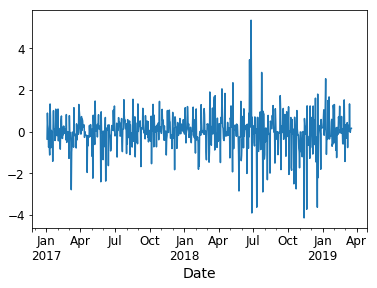

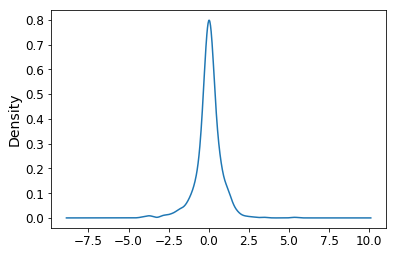

DEXUSEU


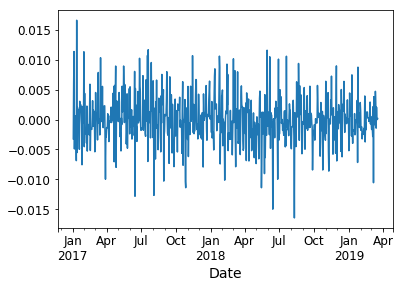

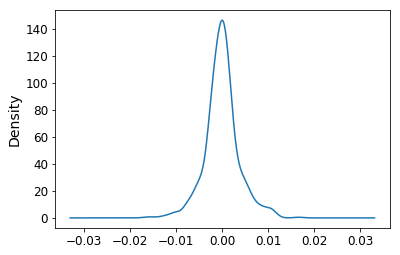

GOLDAMGBD228NLBM


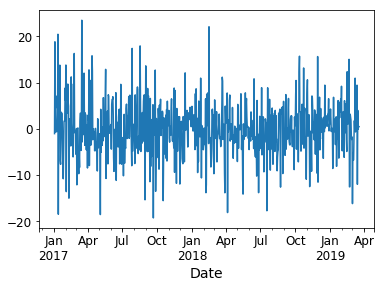

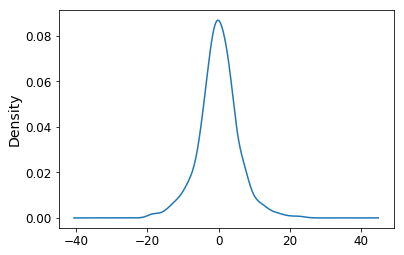

Price


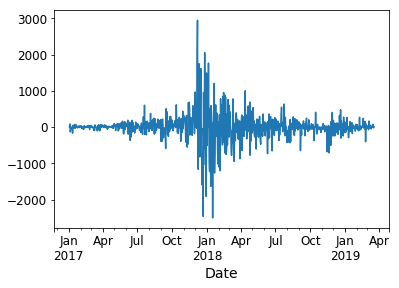

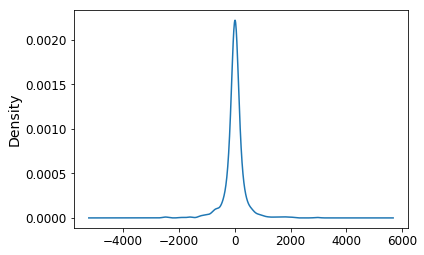

SP500


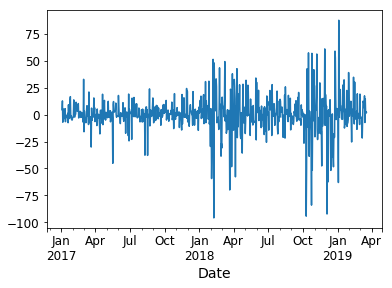

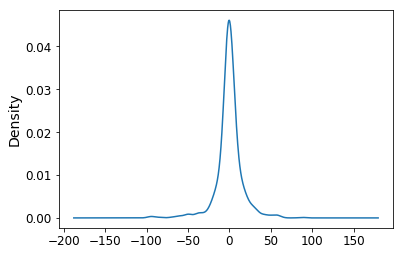

In [415]:
#All residuals are very close to zero 

resid.columns
resid = pd.DataFrame(var_results.resid)
for i in resid.columns:
    print(i)
    resid[i].plot()
    plt.show()
    resid[i].plot(kind='kde')
    plt.show()


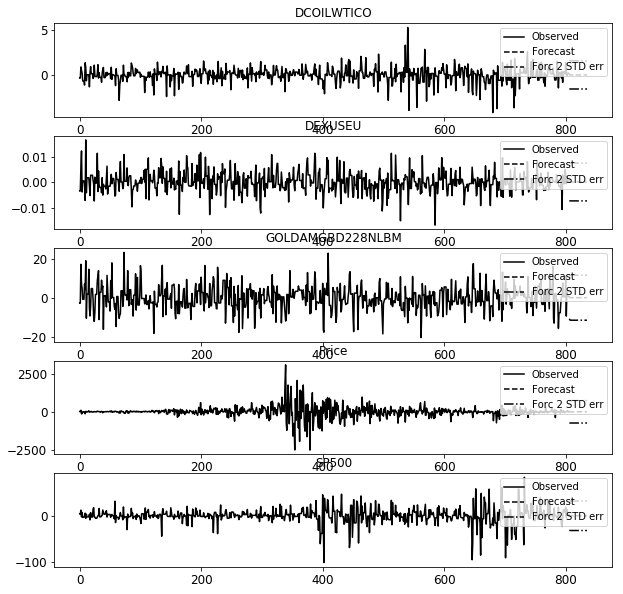

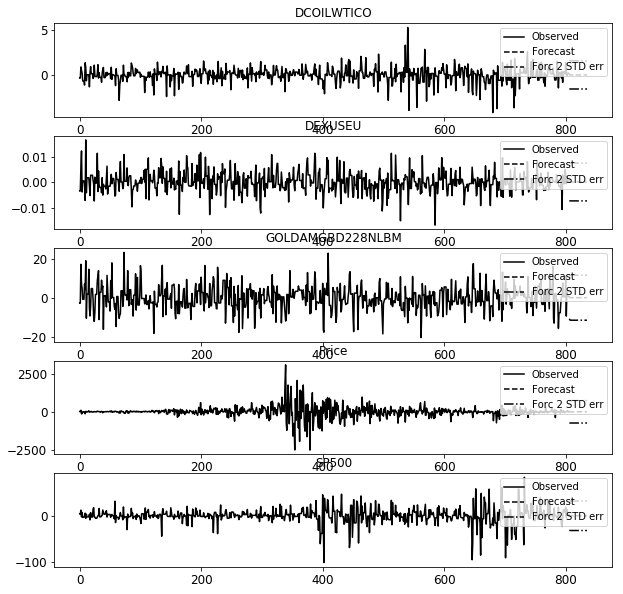

In [412]:
var_results.plot_forecast(steps=30,alpha=0.05)

In [413]:
#VAR Forecast 

var_forecast = var_results.forecast(var_results.y,steps=30)
bitcoin_var_op = var_forecast[:,0]
bitcoin_forcast_var = bprice[-1]+np.cumsum(bitcoin_var_op)